This notebook is to build the models for Hou et al 2011 and model based on discussions with supervisors which is based on a more bottom up aproach compared to traditional OGMs. 

In [1]:
## imports
import Functions as F
import scipy as sc

# Hou et al 2011 Model
 The Hou et al 2011 model needs to be rearranged so as it can be used for my purposes.  I need to express the model in terms of $\frac{dm}{dt}$.
## Rearranging in  term of $\frac{dm}{dt}$
Hou et al. state that:
\begin{align}
    E_m \frac{dm}{dt} = B_0 m^\frac{3}{4} - B_m m 
\end{align}
where:
- $E_m$ : the amount of metabolic energy required to synthesize one unit of biomass
- $B_0$ : Taxon specific constant = $b_0 e^{-\frac{E_0}{KT}}$ (Boltzmann-Arrhenius equation)
- $B_m$ : mass specific metabolic rate = $B_0 M^{-\frac{1}{4}}$


When trying to calculate feeding restricted growth (FR) for a proportion of *ad libitum* growth $\beta$:
\begin{align}
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] = f B_{0, FR}m_{FR}(t)^\frac{3}{4} + E_c \frac{dm_{FR}(t)}{dt} \\
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4} &=  E_c \frac{dm_{FR}(t)}{dt}\\
        \frac{\beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4}}{E_c} &=  \frac{dm_{FR}(t)}{dt}\\
\end{align}

To calculate $m(t) to insert into the above equation:
\begin{align}
   m(t) &= (1 - [1 - (\frac{m_0}{M})^\frac{1}{4}] e^{-\frac{B_{0t}}{4 E_m M^\frac{1}{4}}})^4 M\\
\end{align}

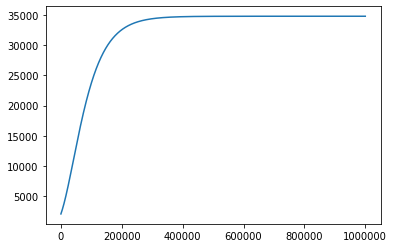

[  2063.           2063.14526226   2063.2905297  ...,  34804.99745243
  34804.99745247  34804.99745252]


In [11]:
# a section to test functions and other functionality
#dog
m0 = 2063
time = 10**6
params = {"beta":1, "f":1.8, "Ec":24000, "Em":4185, "B0":3.92, "B0FR":3.92,  "M":34805}
mass = F.hou_integrate(m0=m0, time=time, params=params)[:,0] # using mice from hou et al 2011
# may want to define B0 and B0FR based on b0 and calculate in function?
F.plot_hou(m0, time, params)
print(mass)

array([  2063.        ,   2063.14526226,   2063.2905297 , ...,
        34804.99745243,  34804.99745247,  34804.99745252])

# Bottom Up Supply Model
A bottom up supply model that uses a functional response scaled by an allocation constraint to define the gain term.

## Simplified Model
\begin{align}
    \frac{1}{m} \frac{dm}{dt} &= Gain - Loss \\
    \frac{1}{m} \frac{dm}{dt} &= \epsilon f(\cdot) - (L_B + L_R) \\
\end{align}
where:
- $\epsilon$ : allocation constraint (efficiency of conversion from food to energy), dimensionless
- $mf\cdot$ : consumption (intake) rate, mass\time
- $L_B$ : Maintenance cost ($\propto$ Resting metabolic rate),  \rate (mass specific)
- $L_R$ : reproductive cost, rate (mass specific)

## Functional Response
\begin{align}
    f(\cdot) &= \frac{a R(t)}{1 + ahR(t)} \\
\end{align}
where:
- $a$ : Search rate, area or volume/time
- $R(t)$ :  Resource Density at time t, mass/area (time dependent)
- $h$ : Handling time

\begin{align}
    f(\cdot)_{lim_{R \to \infty}} &= \frac{1}{h} \\
     \text{at } \textit{ad libitum} \text{ resource availibility} & \text{ consumption is limited by handling time}\\
\end{align}